<a href="https://colab.research.google.com/github/mani544/Creditcard-Fraud-Detection-using-Machine-Learning/blob/main/Creditcard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Credit Card Anomaly Detection**

### Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items they did not purchase.

### Dataset Description

The dataset contains transactions made by credit cards in **September 2013** by **European cardholders**.

- It includes transactions that occurred over **two days**.
- Total transactions: **284,807**
- Fraudulent transactions: **492**
- Fraud ratio: **0.172%** (highly imbalanced dataset)

All input features are **numerical** and are the result of a **PCA transformation**.

- Features: `V1, V2, ..., V28` → principal components obtained using PCA  
- `Time` → seconds elapsed between each transaction and the first transaction in the dataset  
- `Amount` → transaction amount (can be used for example-dependent cost-sensitive learning)  
- `Class` → response variable  
  - `1` = fraud  
  - `0` = non-fraud  

Due to confidentiality issues, the original features and further background information are not provided.

### Task / Inspiration

The goal is to **identify fraudulent credit card transactions**.

Because of the strong **class imbalance**, it is recommended to evaluate models using:

- **Area Under the Precision-Recall Curve (AUPRC)**


### Acknowledgements

The dataset was collected and analyzed during a research collaboration between **Worldline** and the **Machine Learning Group (MLG)** of **ULB (Université Libre de Bruxelles)** on big data mining and fraud detection.



# Importing Required Packages

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [ ]:
data = pd.read_csv("creditcard.csv")

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23853,32953,1.296815,-0.518508,0.348800,0.129750,-0.845934,-0.283287,-0.463165,-0.007344,-0.530097,...,-0.498652,-0.791893,0.058456,0.067753,0.367979,0.400899,0.005089,0.008846,14.00,0.0
23854,32954,1.295646,-0.699613,-1.129649,-2.505043,1.428275,3.010605,-0.892932,0.798386,1.309837,...,0.071540,0.120545,-0.144172,1.066577,0.615628,0.123208,0.013875,0.018547,37.07,0.0
23855,32954,-1.691394,-1.452403,1.671861,-1.769590,1.636843,-0.943701,0.193116,-0.712756,-0.987725,...,0.047745,0.539167,-0.698010,-0.470563,0.621828,-0.254508,-0.724865,-0.360165,53.80,0.0
23856,32954,1.112786,0.062772,1.481419,2.922471,-0.905121,0.366357,-0.670663,0.256586,0.599399,...,0.010125,0.346740,-0.117334,0.416103,0.586102,0.216021,0.042710,0.024984,0.00,0.0


## Exploratory Data Analysis

In [ ]:
# Checking Missing Values
data.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True,  True,  True]])

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Clearly there is no missing values in the dataset...

# Distribution of Fraud vs. Non-Fraud Transactions

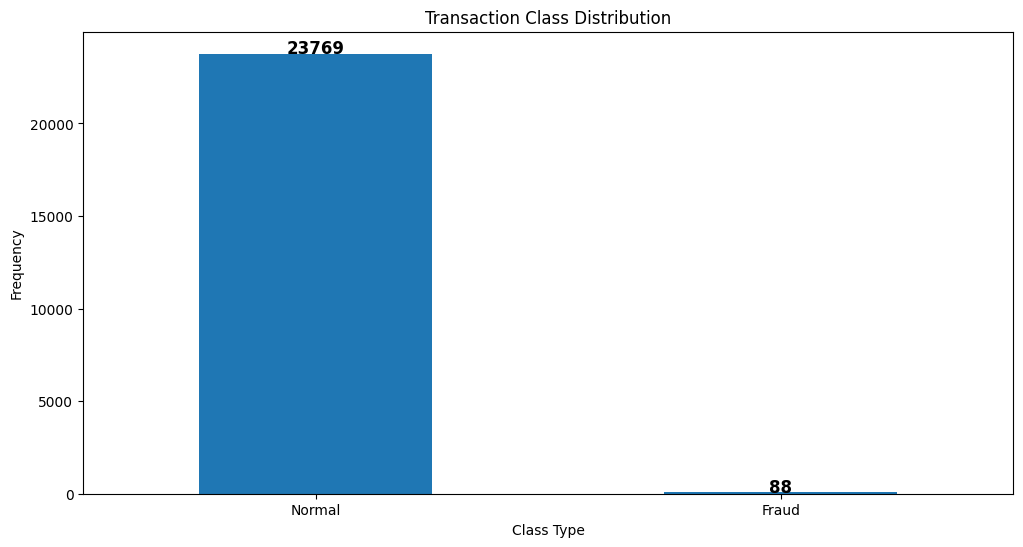

In [ ]:
count_classes = data['Class'].value_counts(sort=True)

ax = count_classes.plot(kind='bar', rot=0)

plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class Type")
plt.ylabel("Frequency")

# Add labels on top of each bar
for i, value in enumerate(count_classes):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12, fontweight='bold')

plt.show()


The chart below shows the distribution of fraudulent and non-fraudulent transactions in the dataset, with **492 fraud cases** and **284,315 non-fraud cases**.  
It highlights the severe class imbalance, where fraudulent transactions make up only a very small fraction of the total records.


In [ ]:
## Get the Fraud and the normal dataset

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [ ]:
print(fraud.shape,normal.shape)

(88, 31) (23769, 31)


In [ ]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

,Amount
count,88.000000
mean,100.010000
std,265.845031
min,0.000000
25%,1.000000
50%,1.000000
75%,99.990000
max,1809.680000


In [ ]:
normal.Amount.describe()

,Amount
count,23769.000000
mean,73.880199
std,212.541174
min,0.000000
25%,6.000000
50%,18.110000
75%,65.850000
max,7879.420000


# Amount Distribution Across Fraudulent and Normal Transactions (Log Scale)

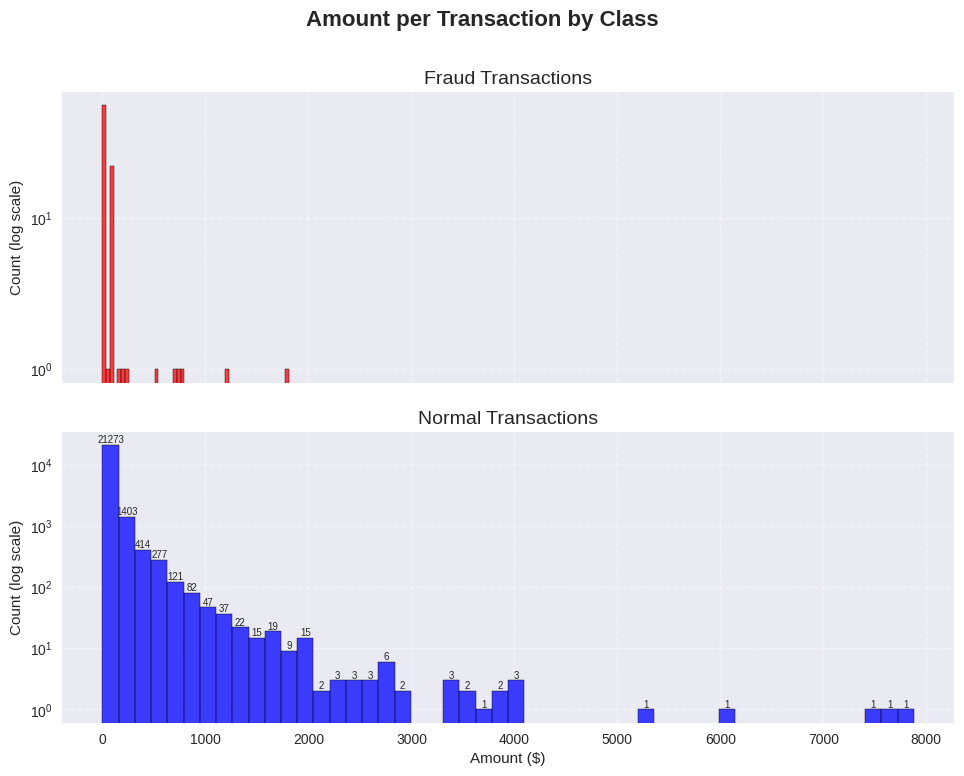

In [ ]:
import seaborn as sns
plt.style.use("seaborn-v0_8")

# Create 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

fig.suptitle("Amount per Transaction by Class", fontsize=16, fontweight='bold')

# Fraud Histogram (NO LABELS)
sns.histplot(fraud['Amount'], bins=50, ax=ax1, color='red', kde=False)
ax1.set_title("Fraud Transactions", fontsize=14)
ax1.set_ylabel("Count (log scale)")
ax1.set_yscale("log")
ax1.grid(True, linestyle="--", alpha=0.5)

# Normal Histogram (WITH LABELS)
normal_hist = sns.histplot(normal['Amount'], bins=50, ax=ax2, color='blue', kde=False)
ax2.set_title("Normal Transactions", fontsize=14)
ax2.set_xlabel("Amount ($)")
ax2.set_ylabel("Count (log scale)")
ax2.set_yscale("log")
ax2.grid(True, linestyle="--", alpha=0.5)

# --- Add labels on bars for NORMAL TRANSACTIONS ---
for p in normal_hist.patches:
    height = p.get_height()
    if height > 0:  # avoid labeling empty bars
        ax2.text(
            p.get_x() + p.get_width() / 2,
            height,
            str(int(height)),
            ha='center',
            va='bottom',
            fontsize=7
        )

plt.tight_layout(pad=2)
plt.show()


# Transaction Time vs. Amount for Fraud and Normal Cases

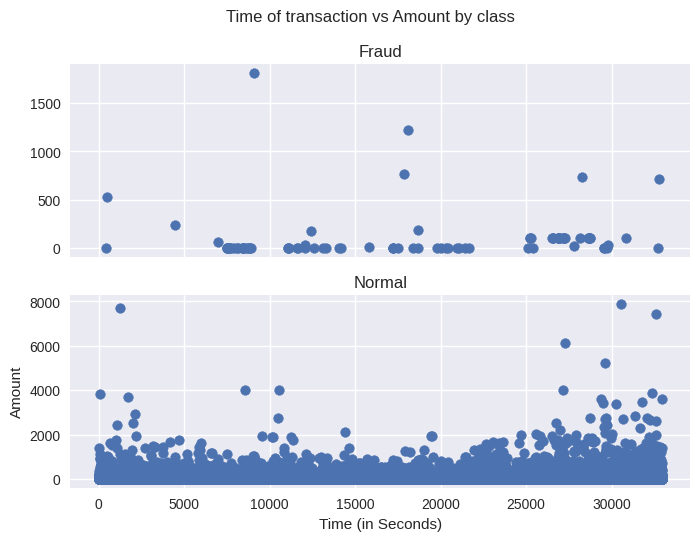

In [ ]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


# Creating a Representative 10% Sample of the Credit Card Dataset

In [ ]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(2386, 31)

In [ ]:
# Total dataset shape
data.shape

(23858, 31)

In [ ]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [ ]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.00336417157275021
Fraud Cases : 8
Valid Cases : 2378


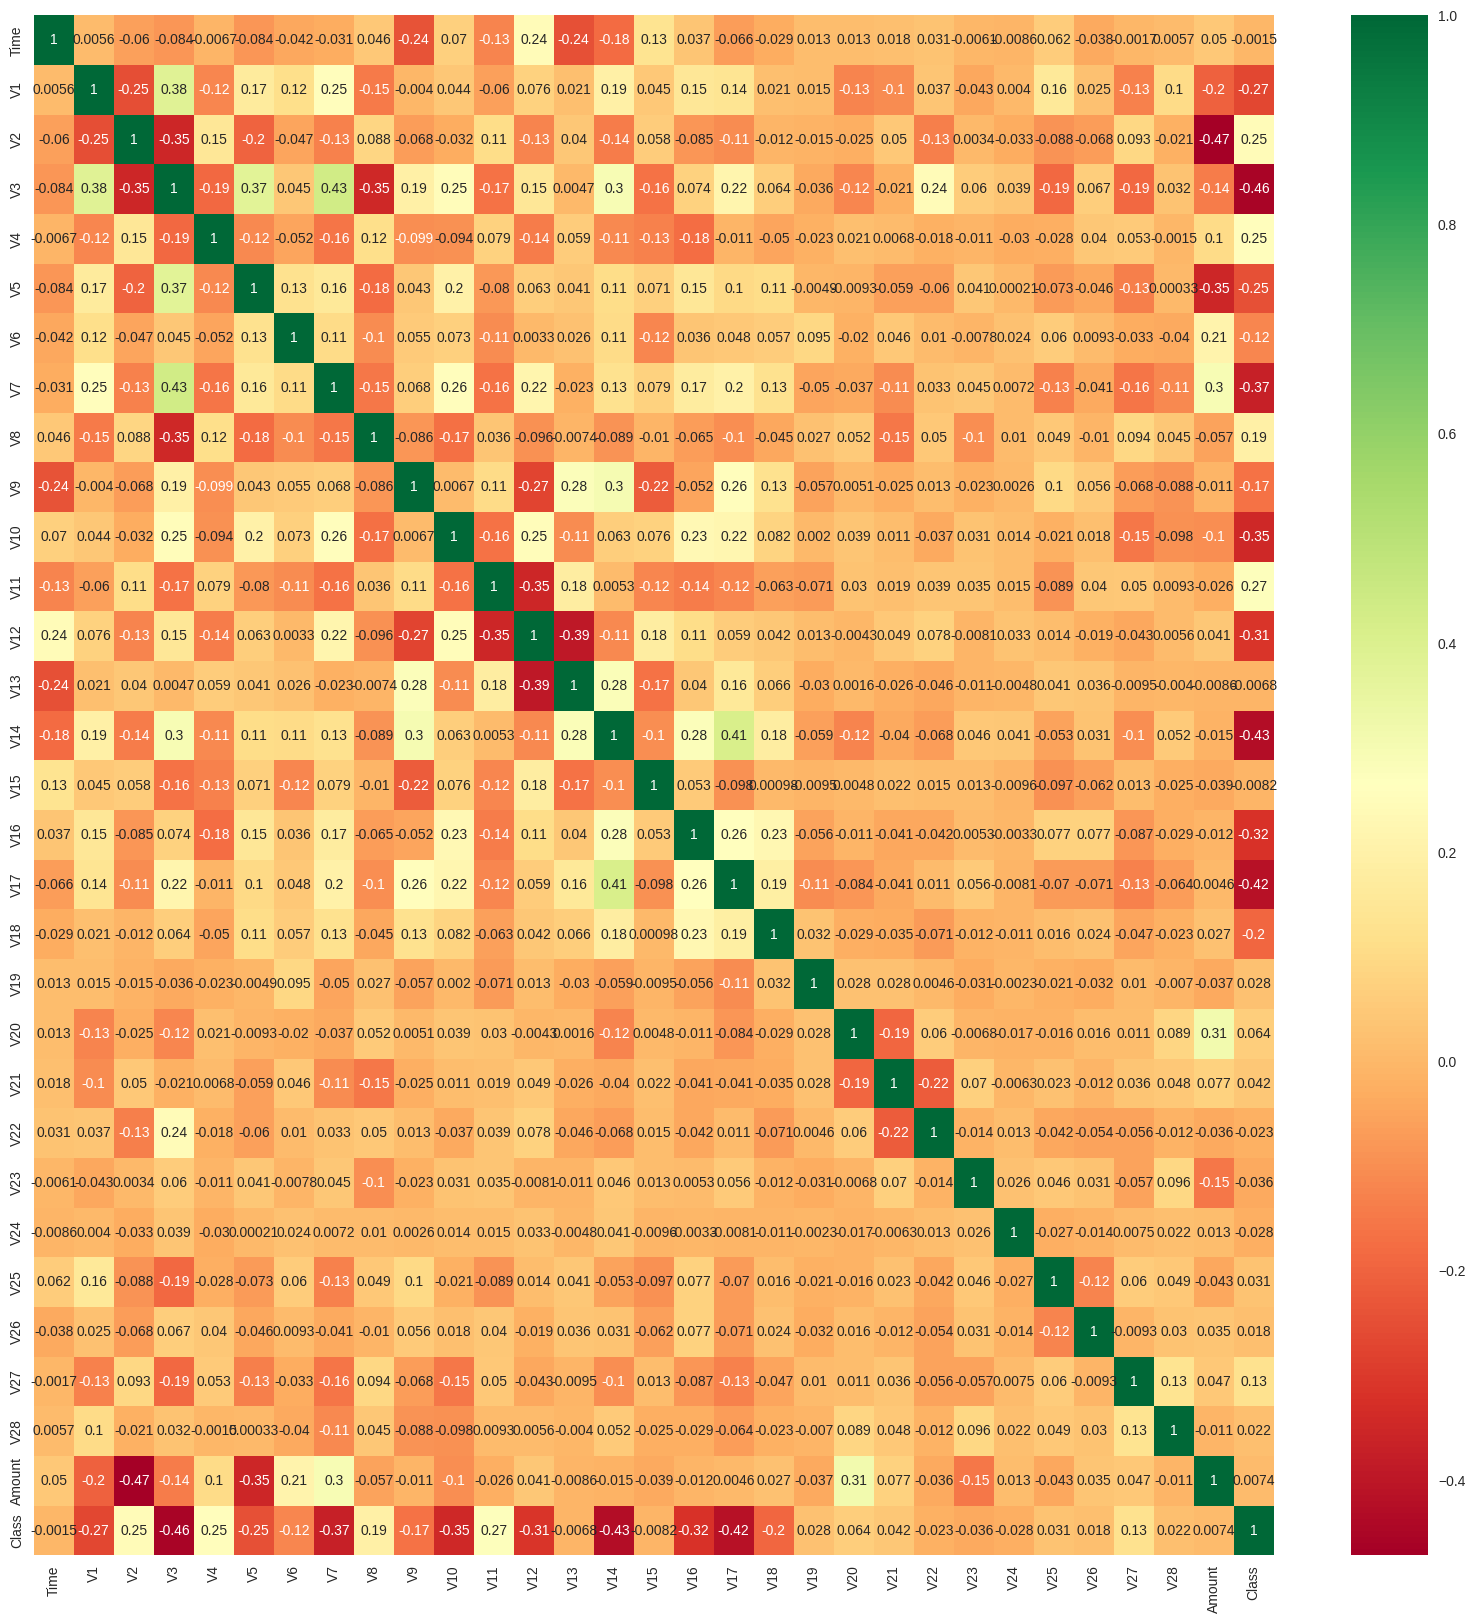

In [ ]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Splitting the Dataset into Features (X) and Target (Y)
## Creating Independent and dependent Variables

In [ ]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(2386, 30)
(2386,)


## Model Prediction





Now it is time to start building the model .The types of algorithms we are going to use to try to do anomaly detection on this dataset are as follows

### Isolation Forest Algorithm :
One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

How Isolation Forests Work
The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.


### Local Outlier Factor(LOF) Algorithm
The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [ ]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05,
                                         max_iter=-1)

}

In [ ]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 9
Accuracy Score :
0.9962279966471081
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2378
         1.0       0.44      0.50      0.47         8

    accuracy                           1.00      2386
   macro avg       0.72      0.75      0.73      2386
weighted avg       1.00      1.00      1.00      2386

Local Outlier Factor: 17
Accuracy Score :
0.9928751047778709
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2378
         1.0       0.00      0.00      0.00         8

    accuracy                           0.99      2386
   macro avg       0.50      0.50      0.50      2386
weighted avg       0.99      0.99      0.99      2386

Support Vector Machine: 1078
Accuracy Score :
0.548197820620285
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      0.55     

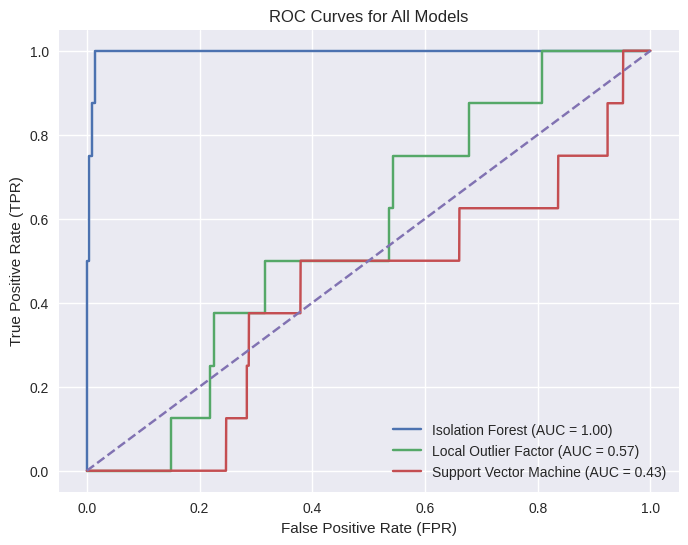

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# Initialize roc_data dictionary
roc_data = {}

# Re-run model fitting and score calculation to populate roc_data
# This assumes 'classifiers', 'X', 'Y' are available from previous cells.
# 'state' and 'outlier_fraction' are also needed and assumed to be in scope.

for clf_name, clf in classifiers.items():
    # Fit the data and get scores for ROC curve
    if clf_name == "Local Outlier Factor":
        # LOF's negative_outlier_factor_ gives anomaly scores where more negative is more anomalous.
        # We negate it so higher values correspond to the positive class (fraud).
        clf.fit_predict(X) # Fit and predict to initialize internal states
        scores = -clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        # OneClassSVM decision_function gives positive for inliers, negative for outliers.
        # We negate it so higher values correspond to the positive class (fraud).
        scores = -clf.decision_function(X)
    else: # Isolation Forest
        clf.fit(X)
        # IsolationForest decision_function returns lower scores for anomalies.
        # We negate it so higher values correspond to the positive class (fraud).
        scores = -clf.decision_function(X)

    # Calculate ROC curve and AUC
    try:
        fpr, tpr, _ = roc_curve(Y, scores, pos_label=1)
        auc = roc_auc_score(Y, scores)
        roc_data[clf_name] = (fpr, tpr, auc)
    except ValueError as e:
        print(f"Could not calculate ROC for {clf_name}: {e}")

plt.figure(figsize=(8, 6))

for clf_name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{clf_name} (AUC = {auc:.2f})")

# Random guess line
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

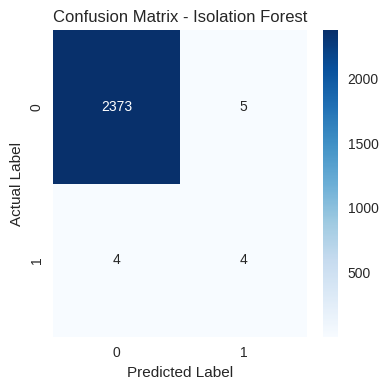

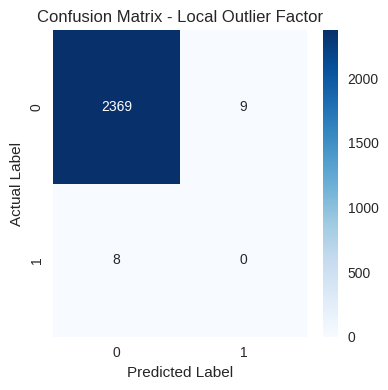

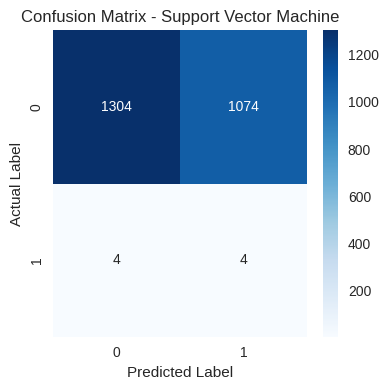

In [ ]:
# Initialize cms dictionary
cms = {}

# Re-run model fitting and prediction to get y_pred for confusion matrix calculation
for clf_name, clf in classifiers.items():
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:  # Isolation Forest
        clf.fit(X)
        y_pred = clf.predict(X)

    # Reshape the prediction values to 0 for Valid transactions, 1 for Fraud transactions
    # Original y_pred mapping: 1 for inliers (normal), -1 for outliers (fraud)
    # Target Y mapping: 0 for normal, 1 for fraud
    # So, we need to map y_pred: 1 -> 0, -1 -> 1
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    # Calculate confusion matrix and store it
    cms[clf_name] = confusion_matrix(Y, y_pred)

# Now plot the confusion matrices
for clf_name, cm in cms.items():
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {clf_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.tight_layout()
    plt.show()

#### Observations :
- Isolation Forest detected 73 errors versus Local Outlier Factor detecting 97 errors vs. SVM detecting 8516 errors
- Isolation Forest has a 99.74% more accurate than LOF of 99.65% and SVM of 70.09
- When comparing error precision & recall for 3 models , the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 27 % versus LOF detection rate of just 2 % and SVM of 0%.
- So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.
- We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases